%%latex

# Kapitel 2 - Deskriptive Statistik

> Die deskriptive (auch: beschreibende) Statistik hat zum Ziel, empirische
> Daten durch Tabellen, Kennzahlen (auch: Maßzahlen oder Parameter) und
> Grafiken übersichtlich darzustellen und zu ordnen. Dies ist vor allem bei
> umfangreichem Datenmaterial sinnvoll, da dieses nicht leicht überblickt
> werden kann - Wikipedia

Sie befasst sich, auf welche Weisen (quantitative) Daten organisiert und zusammengefasst werden können. Dies vereinfacht die Interpretation und die darauffolgende statistische Analyse dieser Daten.

Werkzeuge der deskriptiven Statistik:
* Häufigkeitstabellen für absolute, relative und kumulierte (?) Häufigkeiten
* Masszahlen für die Lage wie Mittelwert, Median und Modus(?)
* Masszahlen für die Streeung der Daten wie Varianz, Spannweite und Quartilsabstand
* Masse für den Zusammenhang zwischen zwei oder mehr Merkmalen wie Korrelationskoeffizienten, empirische Kovarianz, etc.
* Grafiken für die visuelle Darstellung eines oder mehrerer Merkmalen, die den Betrachter die Aussagen der Datensätze intuitiv erfassen lassen

## Arithmetisches Mittel $\overline{x}$

Das bekannteste Mass (Grösse) für die mittlere Lage ist der Durchschnitt.

$$
\overline{x} = \frac{x_1 + x_2 + ... + x_n}{n} = \frac{1}{n} \sum_{i=1}^n x_i
$$

Zeitweise wird auch die Notation $\overline{x_n}$ verwendet, wobei $n$ den Umfang der Messreihe angibt.

In Python kann der Mittelwert einer Pandas Serie mit mean() berechnet werden:

In [1]:
from pandas import Series

methodeA = Series([79.98, 80.04, 80.02, 80.04, 80.03, 80.03, 80.04, 79.97, 80.05, 80.03, 80.02, 80.00, 80.02])
methodeB = Series([80.02, 79.94, 79.98, 79.97, 79.97, 80.03, 79.95, 79.97])
methodeA.mean()

80.02076923076923

## Empirische Varianz und Standardabweichung

> Die empirische Varianz,[1] auch Stichprobenvarianz[2] (veraltet: empirisches Streuungsquadrat) oder einfach nur kurz Varianz (lateinisch variantia für „Verschiedenheit“) genannt, ist eine statistische Angabe für die Streubreite von Werten einer Stichprobe und in der deskriptiven Statistik eine Kennzahl einer Stichprobe. Sie gehört zu den Streuungsmaßen und beschreibt die mittlere quadratische Abweichung der einzelnen Messwerte vom empirischen Mittelwert. Sie stellt damit eine Art durchschnittliches Abweichungsquadrat dar. Die positive Wurzel der empirischen Varianz ist die empirische Standardabweichung. Die empirische Standardabweichung stellt das gebräuchlichste Streuungsmaß dar. - Wikipedia.

Es sind Masszahlen für die Streeung der Daten: Verteilung der einzelnen Werte um den Mittelwert. Liegen die Daten sehr dicht am Mittelwert, spricht man von einer schwachen Streuung, liegen sie weit entfernt um ihn, dann von einer starken Streuung.

Die Standardabweichung (auch oft "mittlere Abweichung") $s_x$ ist die Wurzel aus der Varianz $var_x$. Die Standardabweichung halt dieselbe Einheit wie die Daten selbst. Die empirische Varianz hat keine physikalische Bedeutung. Wir wissen nur, je grösser dieser Wert, desto grösser die Streeung.

$$
	var_x = \frac{(x_1 - \overline{x_n})^2 + (x_2 - \overline{x_n})^2 + ... + (x_n - \overline{x_n})^2 }{n - 1} = \frac{1}{n-1} \sum_{i=1}^n (x_i - \bar{x_n})^2
$$

Die empirische Standardabweichung $s_x$
$$
	s_x = \sqrt{var_x}
$$

In Python dienen dazu die Funktionen var() und std():

In [2]:
var = methodeA.var()
std = methodeA.std()

print("Varianz:", var)
print("Standardabweichung:", std)

Varianz: 0.0005743589743590099
Standardabweichung: 0.023965787580611863


## Median

> Ein weiteres Lagemass für die mittlere Lage ist der Median. Es handelt sich dabei um den Wert, bei dem rund die Hälfte der Messwerte unterhalb von diesemWert liegen. Ist beispielsweise bei einer Prüfung der Median 4.6, dann hat die Hälfte der Klasse eine Note unterhalb von 4.6. Umgekehrt liegen die Noten der anderen Hälfte oberhalb
dieser Note. - Skript

Die Daten müssen der Grösse nach geordnet sein, sodass der Median bestimmt werden kann ($x_1 \le x_2 \le ... \le x_n$)
Ist die Anzahl der Werte gerade, so gibt es keine "Mitte". Der Median berechnet sich dann aus de Mittelwert der mittleren Beobachtungen (z.B. bei $n=8$ wäre dies das Mittel der 4. und 5. Beobachtung)

\say{Eine Eigenschaft des Medians ist die Robustheit. Der Median wird weniger stark durch
extreme Beobachtungen beeinflusst als das arithmetische Mittel.} - Skript

Das arithmetische Mittel ist anfällig auf Ausreisser.

In Python können die Daten mit sort_values einer Serie sortiert werden und mit median() der Median berechnet werden:

In [3]:
methodeA_sorted = methodeA.sort_values()
median_methodeA = methodeA_sorted.median()

median_methodeB = methodeB.median()

print("Median Methode A:", median_methodeA)
print("Median Methode B:", median_methodeB)

Median Methode A: 80.03
Median Methode B: 79.97


## Quartile

> Quartile sind Werte, die eine Stichprobe von Daten in vier gleiche Teile teilen. Mit diesen können Sie die Streubreite und die Zentraltendenz eines Datensatzes schnell bestimmen; dies sind wichtige Schritte, mit denen Sie erste Erkenntnisse über die Daten gewinnen. - minitab.com

| Quartil | Beschreibung |
|---------|--------------|
| Erstes Quartil (Q1) | 25% der Werte sind unter oder gleich ($\le$) diesem Wert |
| Zweites Quartil (Q2) | 50% der Werte sind unter oder gleich ($\le$) diesem Wert |
| Drittes Quartil (Q3) | Drittes Quartil (Q3) & 75% der Werte sind unter oder gleich ($\le$) diesem Wert |
| Interquartilbereich | Der Abstand zwischen dem ersten und dem dritten Quartil (Q3–Q1) damit umfasst dies die mittleren 50% der Daten |

## Quantile

> Vereinfacht teilt ein empirisches p-Quantil die Stichprobe so, dass ein Anteil der Stichprobe von p kleiner als das empirische p-Quantil ist und ein Anteil von 1-p der Stichprobe größer als das empirische p-Quantil ist. Ist beispielsweise eine Stichprobe von Schuhgrößen gegeben, so ist das empirische 0,35-Quantil diejenige Schuhgröße $s$ , so dass 35\% der Schuhgrößen in der Stichprobe kleiner als $s$  sind und 65\% größer als $s$   sind.

### Verallgemeinerung der Quartile auf beliebigen Prozentwert

**Beispiel**: 10%-Quantil entspricht der Aussage, dass 10% der Werte kleiner oder gleich ($\le$) diesem Wert sind und folglich sind 90% grösser oder gleich ($\ge$) diesem Wert sind.

**Verallgemeinerung des empirischen $\alpha$-Quantil**: $\alpha \cdot 100$\% der Werte sind kleiner oder gleich ($\le$) diesem Wert und $(1 - \alpha) \cdot 100$\% der Werte sind grösser oder gleich $(\ge)$ diesem wert.


**Empirische $\alpha$-Quantile $(0 \lt \alpha \lt 1)$**

$$x_n = \begin{cases}
\frac{1}{2} (x_{\alpha n} + x_{\alpha n + 1}) & \text{falls $\alpha \cdot n$ eine natürliche Zahl ist} \\
x_{k}  & \, \text{wobei $k$ die Zahl $\alpha n$ aufgerundet ist.}
\end{cases}$$

In Python werden diese mit `quantile` einer Serie berechnet:

### Median & Quartile

Das zweite Quartil entspricht dem Median. (to be verified)

### Quartilsdifferenz


> Ein weiteres Streuungsmass für die Daten. Es misst die Länge des Intervalls, das etwa dieHälfte dermittleren Beobachtungen enthält. Je kleiner dieses Streuungsmass ist, desto näher liegt die Hälfte aller Werte beim Median und desto kleiner ist die Streuung. Dieses Streuungsmass ist robust

Quartilsdifferenz: oberes Quartil - unteres Quartil. 


In [4]:
q1 = methodeA.quantile(q=.25)
q3 = methodeA.quantile(q=.75)
quantile_difference = q3 - q1

print("Erstes Quantil:", q1)
print("Drittes Quantil:", q3)
print("Interquartilbereich:", quantile_difference)
print(f"Interpretation, Beispiel Q3: 75% der Werte sind grösser oder gleich {q3}")

# Also possible to write
q75, q25 = methodeA.quantile(q = [.75, .25])
iqr = q75 - q25
print(iqr)

Erstes Quantil: 80.02
Drittes Quantil: 80.04
Interquartilbereich: 0.020000000000010232
Interpretation, Beispiel Q3: 75% der Werte sind grösser oder gleich 80.04
0.020000000000010232


### Beispiel: Messung der Schmelzwärme von Eis mit Methode A

Es sind n = 13 Messwerte, die wir zuerst der Grösse nach ordnen: der kleinste Wert ist x(1) = 79.97, der drittgrösste Wert x(3) = 80.00, der grösste Wert x(13) = 80.05. Wir wollen das 25%-Quantil, den Median und das 75%-Quantil bestimmen. Im Fall vom 25%-Quantil ist dann α = 0.25, also:

$$
\alpha \cdot n = 0.25 \cdot 13 = 3.25
$$

Dies ist keine natürliche Zahl (und daher keine Position in dieser Serie), und gemäss obiger Definition wird deshalb auf 4 aufgerundet. Dies ergibt $x_{(4)} = 80.02$ Sprich die vierte Position wird als 25%-Quantil genommen und diese beträgt $80.02$

Weitere Quantile können analog zu oben berechnet werden.

In [5]:
print("10% Quantil:", methodeA.quantile(q=.1))
print("70% Quantil:", methodeA.quantile(q=.7))

10% Quantil: 79.98400000000001
70% Quantil: 80.034


#### Beispiel 2.1.15

n einer Schulklasse mit 24 SchülerInnen gab es an einer Prüfung folgende Noten: 4.2, 2.3, 5.6, 4.5, 4.8, 3.9, 5.9, 2.4, 5.9, 6, 4, 3.7, 5, 5.2, 4.5, 3.6, 5, 6, 2.8, 3.3, 5.5, 4.2, 4.9, 5.1
Wir berechnen nun mit Python verschiedene Quantile:

In [6]:
import numpy as np

print()

grades = Series([4.2, 2.3, 5.6, 4.5, 4.8, 3.9, 5.9, 2.4, 5.9, 6, 4, 3.7, 5, 5.2, 4.5, 3.6, 5, 6, 2.8, 3.3, 5.5, 4.2, 4.9, 5.1])
grades.quantile(q = np.linspace(start=.2, stop=1, num=5))

# for a quick overview of the data, call describe()
grades.describe()

count    24.000000
mean      4.512500
std       1.104265
min       2.300000
25%       3.850000
50%       4.650000
75%       5.275000
max       6.000000
dtype: float64

### Histogramm

> Ein Histogramm ist eine grafische Darstellung der Häufigkeitsverteilung kardinal skalierter Merkmale. Es erfordert die Einteilung der Daten in Klassen (englisch bins), die eine konstante oder variable Breite haben können. Es werden direkt nebeneinanderliegende Rechtecke von der Breite der jeweiligen Klasse gezeichnet, deren Flächeninhalte die (relativen oder absoluten) Klassenhäufigkeiten darstellen.[1][2][3] Die Höhe jedes Rechtecks stellt dann die (relative oder absolute) Häufigkeitsdichte dar, also die (relative oder absolute) Häufigkeit dividiert durch die Breite der entsprechenden Klasse.[4] - Wikipedia

Schrittweises Vorgehen:
1. Datenmenge in Klassen einteilen. (siehe Faustregel)
2. Für jede Klasse wird ein Balken eingezeichnet. Die Höhe ist **proportional zur Anzahl Beobachtungen** dieser Klasse
3. Der prozentuale Anteil der Klasse zur Gesamtbeobachtung erhält man durch Dividieren der Anzahl Beobachtungen einer Klasse durch die Gesamtzahl.


Faustregel:
Es gilt die Faustregel, um die Anzahl an Klassen zu bestimmen ($n$ ist die Anzahl Messungen)
* $n \lt 50$ ist die Klassenzahl 5 bis 7
* $n \gt 250$: 10 bis 20 Klassen

Alternativ gibt es auch die Sturges-Regel (Anzahl Klassen $k$, Anzahl Messungen $n$):
$$
k = 1 + log_2n = 1 + 3.3 \cdot log_{10}n
$$

#### Histogramme in Python

Siehe nächste Cell.

Bemerkungen:
* `pandas` nutzt die `matplotlib` um Plots zu machen (über die allgemeine `plot`-Methode von `pandas`
* `kind="hist"` gibt den Typ an (in diesem Falle: Histogramm)
* Per Default werden 10 bins gewählt, kann jedoch mit dem kwargs `bins` geändert werden.
* (Skript): Bedeutung der Anzahlen (Frequency): Da 10 Klassen gewählt wurden und die Werte im Bereich [79.97, 80.05] liegen, ist die Balkenbreite (80.05 − 79.97)/10 = 0.008. In der 1. Klasse 79.97-79.978 sind die Beobachtungen mit dem 79.97 berücksichtigt; in der 2. Klasse 79.98; usw.

In [7]:
from pandas import DataFrame, Series
import matplotlib.pyplot as plt

methodeA = Series([79.98, 80.04, 80.02, 80.04, 80.03, 80.03, 80.04, 79.97, 80.05, 80.03, 80.02, 80.00, 80.02])
methodeB = Series([80.02, 79.94, 79.98, 79.97, 79.97, 80.03, 79.95, 79.97])

methodeA.plot(kind="hist", edgecolor="black")

# Configure plot
plt.title("Histogramm von Methode A")
plt.xlabel("methodeA")
plt.ylabel("Haeufigkeit")

# Present plot
plt.show()

<Figure size 640x480 with 1 Axes>

##### Histogramm normieren

mHistogramm oben entspricht die Höhe der Balken gerade der Anzahl der Beobachtungen in einer Klasse. Oft ist es besser und übersichtlicher, wennwir die Balkenhöhe so wählen, dass die Balkenfläche dem prozentualen Anteil der jeweiligen Beobachtungen an der Gesamtanzahl Beobachtungen entspricht. Die Gesamtfläche aller Balken muss dann gleich eins sein.

Auf der vertikalen Achse sind nun die Dichten dieser Klassen angegeben. Wir können also herauslesen, dass sich in der Klasse (80.018 − 80.026)· 28.846 = 0.23, also etwa 23% der Daten zwischen 80.018 und 80.026 befinden.


> Diese Darstellung hat den Vorteil, dass man Messungen mit unterschiedlichen Umfängen besser miteinander vergleichen kann. Würde man also mit Methode A nun eine Messung mit 30 Beobachtungen durchführen, liessen sich mit Dichten besser die
Verteilungen von Messwerten auf die jeweiligen Klassen vergleichen.

=> Breite * Höhe berechnen ergibt den *prozentualen* Anteil dieser Klasse.

In Python kann man mittels kwargs `normed=True` das Histogramm normieren:

C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


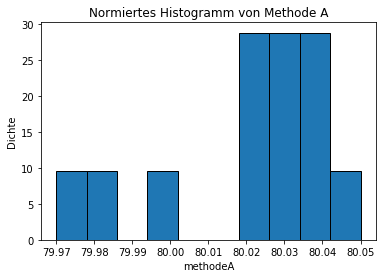

In [8]:
methodeA.plot(kind="hist", normed=True, edgecolor="black")

plt.title("Normiertes Histogramm von Methode A")
plt.xlabel("methodeA")
plt.ylabel("Dichte")

plt.show()

### Boxplot

> Der Boxplot ist vor allem dann geeignet, wenn man die Verteilungen der Daten in verschiedenen Gruppen (die im Allgemeinen verschiedenen Versuchsbedingungen
entsprechen) vergleichen will.

Die Darstellung eines Boxplots besteht aus:

* Rechteck (Höhe ist vom 25%- zum 75% Quantil
* Linien zum kleinsten- und grössten "normalen" Wert. Normaler Wert ist höchstens 1.5 mal die Quartilsdifferenz.
* Horizonzalen Strich für Median
* Kleine Kreise für Ausreisser

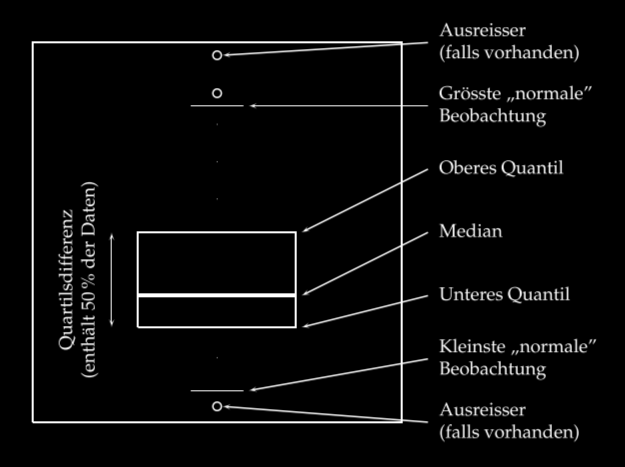

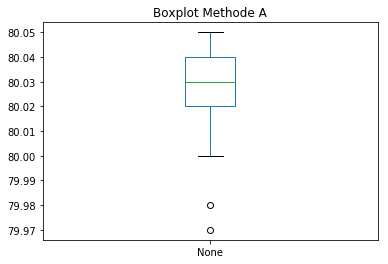

In [9]:
methodeA.plot(kind="box", title="Boxplot Methode A")

Aus diesem Boxplot lassen sich einfach folgende Informationen auslesen:
* Die Hälfte der Beobachtungen liegen im Bereich zwischen dem unteren Quantil (80.02) und dem oberen Quantil (80.04).
* Median liegt *ungefährt* bei 80.3 (50% der Werte darunter, 50% der Werte darüber)
* 25% der Werte liegen unter ~80.02 (oder: 75% der Werte liegen über 80.02)
* 75% der Werte liegen unter 80.04 (oder: 25% der Werte liegen über 80.04) 
* Es gibt zwei Ausreisser bei 79.97 und 79.98

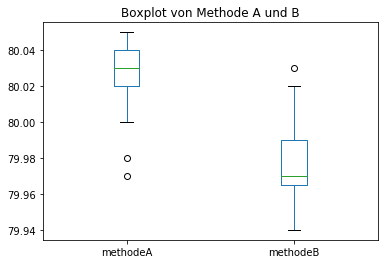

In [10]:
### Mehrere Messungen plotten
methode = DataFrame({
    "methodeA": methodeA,
    "methodeB": methodeB
})

methode.plot(kind="box", title="Boxplot von Methode A und B")

Interpretation:
* Methode A liefert die grösseren Werte als Methode B, da der Median von A grösser ist.
* Die Daten von Methode A haben weniger Streuung als die Daten von Methode B, da das Rechteck weniger hoch ist (Quartilsdifferenz!)

### Empirische kumulative Verteilungsfunktion

Die empirische kumulative Verteilungsfunktion $F_n(\cdot)$ ist eine Treppenfunktion. Sie ist eine graphische Darstellung und hat den Vorteil gegenüber dem Histogramm, dass der Medien einfach abgelesen werden kann.

Sie ist definiert als:
$$
F_n(a) = \frac{1}{n} \text{Anzahl}\{i|x_i \le a\}
$$

> Eine empirische Verteilungsfunktion – auch Summenhäufigkeitsfunktion oder Verteilungsfunktion der Stichprobe genannt – ist in der beschreibenden Statistik und der Stochastik eine Funktion, die jeder reellen Zahl $x$ den Anteil der Stichprobenwerte, die kleiner oder gleich $x$ sind, zuordnet. Die Definition der empirischen Verteilungsfunktion kann in verschiedenen Schreibweisen erfolgen.

// Links von 79.97 beträgt dieser Wert $0$, da es keinen Wert kleiner als 79.97 // gibt. Bei $x = 79.97$ beträgt der Wert 

Die Methode A sortiert:
```
[79.97, 79.98, 80.0, 80.02, 80.02, 80.02, 80.03, 80.03, 80.03, 80.04, 80.04, 80.04, 80.05]
```

Somit steigt der Wert bei $x = 79.97$ um $\frac{1}{n}$. $1$ da der Wert nur einmal vorkommt und $n$ beträgt ist der Stichprobenumfang. Dasselbe für $x = 79.98$. Die Funktion bleibt bis $x = 80.0$ flach, da es keine anderen Werte gibt. Bei $x = 80.02$ steigt die Funktion um $\frac{3}{n}$ an, da dieser Wert dreimal vorkommt. Bei 80.05 macht die Funktion ihren letzten Sprung, der Funktionswert wird 1.


##### Python
(Der Median liegt bei $y = 0.5$)

In [44]:
def cumul(a, elements):
    """
    Example implementation of above function.
    
    No warranty that it is correct.
    """
    values = []
    n = len(elements)
    for i in elements:
        if i <= a:
            values.append(i)
    
    return len(values) * (1/n)


print("79.97: Wert beträgt 1/13:", cumul(79.97, methodeA))
print("80.05: Wert beträgt 13/13:", cumul(80.05, methodeA))

79.97: Wert beträgt 1/13: 0.07692307692307693
80.05: Wert beträgt 13/13: 1.0


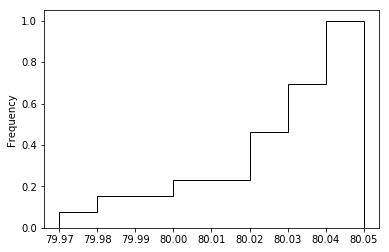

In [45]:
methodeA.plot(kind="hist",
              cumulative=True,
              histtype="step",  # Darstellung als Treppenfunktion
              normed=True,
              bins=8,
              edgecolor="black")

# 2.2 Deskriptive Statistik 2D-Daten

Es werden zwei verschiedene Grössen / Dimensionen gemessen. Beispielsweise bei einer Gruppe von Menschen die Körpergrösse *und* das Körpergewicht.

### Beispiel 2.2.1 - Weinkonsum und Mortalität

> Wir betrachten als Beispiel einen Datensatz (siehe Tabelle 2.2), der den durchschnittlichen Weinkonsum (in Liter pro Person und Jahr) und die Sterblichkeit (Mortalität) aufgrund von Herz- und Kreislauferkrankungen (Anzahl Todesfälle pro 1000 Personen zwischen 55 und 64 Jahren pro Jahr) in 18 industrialisierten Ländern umfasst 3. Es stellt sich nun die Frage, ob diese Daten suggerieren, dass es einen Zusammenhang zwischen der Sterblichkeitsrate aufgrund von Herzkreislauferkrankung und
Weinkonsum gibt - Skript


## Streudiagramm / Scatterplot

> Ein Streudiagramm, auch Punktwolke genannt (engl. scatter plot), ist die graphische Darstellung von beobachteten Wertepaaren zweier statistischer Merkmale. Diese Wertepaare werden in ein kartesisches Koordinatensystem eingetragen, wodurch sich eine Punktwolke ergibt. Die Darstellung der Punkte kann durch verschiedene kleine Symbole erfolgen.
Man erhofft sich durch das Muster der Punkte im Streudiagramm Informationen über die Abhängigkeitsstruktur der beiden Merkmale zu erkennen, die durch die Koordinaten repräsentiert sind. - Wikipedia


Das obige Beispiel kann in einem Scatterplot dargestellt werden. Dabei werden die zwei Grössen *Weinkonsum* in $x_1, x_2, ..., x_18$ und die Mortalität in $y_1, y_2, ..., y_18$ dargestellt, wobei $x_i$ respektive $y_i$ das i-te Land darstellt. Ein Land wird als $(x_i, y_i)$ dargestellt.

Der Scatterplot kann in Python mit `plot(kind="scatter"...)` erzeugt werden. Als kwargs müssen die Werte für die `x` und `y` Achse bestimmt werden.

Aus dem erzeugten Scatterplot sieht man, dass für diese Beziehung gilt: ein höherer Weinkonsum hat keine Abhängigkeit zu höherer Mortalität.

> Man sieht einen klaren monoton fallenden Zusammenhang: Länder mit hohem Weinkonsum haben also eine Tendenz zu einer tieferen Mortalitätsrate wegen Herz- und Kreislaufkrankheiten. - Skript

Bemerkungen (Skript):
* Die Schlussfolgerung, dass hoher Weinkonsum gesund ist, ist voreilig und vermutlich falsch. Es scheint, dass höherer Weinkonsum zu weniger Toten wegen Herz- und Kreislaufkrankheiten führt. Der Einfluss des höheren Weinkonsums auf andere Körperorgane (z.B. Leber) oder auf die Anzahl Verkehrsunfälle, wird hier nicht untersucht.
* Obwohl sich aufgrund des Streudiagramms ein Zusammenhang zwischen Weinkonsum und Mortalität erahnen lässt, muss nicht zwingend ein kausaler Zusam-
menhang zwischen den beiden Grössen vorhanden sein.

# TODO

Welche Arten von Zusammenhang? Positiv / negativ? => wahrscheinlich weiter unten dokumentiert

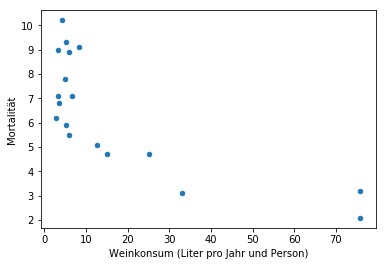

In [48]:
from pandas import DataFrame, Series

mortality = DataFrame({
    "wine": ([2.8, 3.2, 3.2, 3.4, 4.3, 4.9, 5.1, 5.2, 5.9, 5.9, 6.6, 8.3, 12.6, 15.1, 25.1, 33.1, 75.9, 75.9]),
    "mor": ([6.2, 9.0, 7.1, 6.8, 10.2, 7.8, 9.3, 5.9, 8.9, 5.5, 7.1, 9.1, 5.1, 4.7, 4.7, 3.1, 3.2, 2.1])
})

mortality.plot(
    kind="scatter",
    x="wine",
    y="mor"
)

plt.xlabel("Weinkonsum (Liter pro Jahr und Person)")
plt.ylabel("Mortalität")
plt.show()

## Einfache lineare Regression

Lingo:
* Gerade = Regressionsgerade $y = a + bx$

> In der Statistik ist die lineare Einfachregression, oder auch einfache lineare Regression (kurz: ELR, selten univariate lineare Regression) genannt, ein regressionsanalytisches Verfahren und ein Spezialfall der linearen Regression. Die Bezeichnung einfach gibt an, dass bei der linearen Einfachregression nur eine unabhängige Variable verwendet wird, um die Zielgröße zu erklären. Ziel ist die Schätzung von Achsenabschnitt und Steigung der Regressionsgeraden sowie die Schätzung der Varianz der Störgrößen. - Wikipedia


Gemäss der UZH (https://www.methodenberatung.uzh.ch/de/datenanalyse_spss/zusammenhaenge/ereg.html):

> Die einfache Regressionsanalyse wird auch als "bivariate Regression" bezeichnet. Sie wird angewendet, wenn geprüft werden soll, ob ein Zusammenhang zwischen zwei intervallskalierten Variablen besteht. "Regressieren" steht für das Zurückgehen von der abhängigen Variable y auf die unabhängige Variable x. Daher wird auch von "Regression von y auf x" gesprochen. Die abhängige Variable wird im Kontext der Regressionsanalysen auch als "Kritieriumsvariable" und die unabhängige Variable als "Prädiktorvariable" bezeichnet. 
Mittels der einfachen Regressionsanalyse können drei Arten von Fragestellungen untersucht werden:
> * **Ursachenanalyse**: Gibt es einen Zusammenhang zwischen der unabhängigen und der abhängigen Variable? Wie eng ist dieser?
> * **Wirkungsanalyse**: Wie verändert sich die abhängige Variable bei einer Änderung der unabhängigen Variablen?
> * **Prognose**: Können die Messwerte der abhängigen Variable durch die Werte der unabhängigen Variable vorhergesagt werden?
Es ist an dieser Stelle anzumerken, dass jeder postulierte Kausalzusammenhang theoretisch begründet sein muss.
> Die Fragestellung der Regressionsanalyse wird oft so verkürzt: "Wie beeinflusst eine unabhängige Variablen die abhängige Variable?" oder "Können die Messwerte der abhängigen Variable durch die Werte der unabhängigen Variablen vorhergesagt werden?" oder "Wie stark ist der Einfluss der unabhängigen Variable auf die abhängige Variable?"

#### Beispiel: Zusammenhang Seitenzahl-Preis eines Buches

TODO Umschreiben:
> Wir erklären das Modell der einfachen linearen Regression zunächst mit einem fiktiven Beispiel. Je dicker ein Roman (Hardcover) ist, desto teurer ist er in der Regel. Es gibt also einen Zusammenhang zwischen Seitenzahl x und Buchpreis y. Wir gehen in einen Buchladen und suchen zehn Romane verschiedener Dicken aus. Wir nehmen dabei je ein Buch mit der Seitenzahl 50, 100, 150, . . . , 450, 500. Von jedem Buch notieren wir die Seitenzahl und den Buchpreis. Mit diesen Daten erstellen wir Tabelle 2.3.
Aus der Tabelle ist tatsächlich ersichtlich, dass dickere Bücher tendenziell mehr kosten. Wennwir einen formelmässigen Zusammenhang zwischen Buchpreis und Seitenzahl hätten, könnten wir Vorhersagen über den Preis für Bücher mit Seitenzahlen machen, die wir nicht beobachtet haben. Was würde dann voraussichtlich ein Buch mit 375 Seiten kosten? Oder wir könnten herausfinden, wie teuer ein Buch mit „null” Seiten wäre. Das wären die Grundkosten des Verlags, die unabhängig von der Seitenzahl anfallen: Einband, administrativer Aufwand für jedes Buch, etc. Wie könnten wir diesen Zusammenhang mit einer Formel beschreiben? Das Streudiagramm in Abbildung 2.7 zeigt diesen Zusammenhang graphisch deutlicher auf.
Auf den ersten Blick scheint eine Gerade recht gut zu den Daten zu passen. Diese Gerade hätte die Form
$$ y = a + bx $$
mit y dem Buchpreis und x der Seitenzahl sind. Der Parameter a beschreibt dann die Grundkosten des Verlags und der Parameter b entspricht den Kosten pro Seite.

### Methode der kleinsten Quadrate

Zentrale Fragestellung: *"Wie können wir eine Gerade finden, die möglichst gut zu allen Punkten passt?"*

Um zu quantifizieren, wie *gut* diese Gerade *passt* muss ein Mass eingeführt werden. Dazu kann die vertikale Distanz der Beobachtungen und Gerade summieren. Umso kleiner die Summe, umso besser passt die Gerade:

Diese Differenz bezeichnen wir als *Residuum* $r_i$, den Beobachtungspunkt als $(x_i, y_i)$. Der Punkt auf der Geraden hat die Koordinaten $(x_i, a + bx_i)$. Den Reisduum kann nun wie folgt berechnet werden:

$$
r_i = y_i - (a + bx_i) = y_i - a - bx_i
$$

Da uns nur die vertikale Distanz interessiert, nehmen wir nur die Werte der $y$-Achse. Als nächstes gilt es die Gerade zu bestimmen, welche die Summe der Residuuen möglichst klein haltet:
$$
r_1 + r_2 + ... + r_n = \sum_i r_i
$$

**ACHTUNG**: Diese Methode hat ein grosses Problem: sind die Hälfte der Residuuen positiv, die andere negativ, so gleichen sich diese aus. Die Summe ist also nahe null, obwohl diese Gerade nicht positiv ist.

Der absolute Wert zu nehmen ist hier nicht empfohlen da mit ihnen nicht bequem rechnen lässt. Deshalb werden diese Abweichungen / Residuuen quadriert!
$$
r^2_1 + r^2_2 + ... + r^2_n = \sum_i r^2_i
$$


Parameter $a$ und $b$ der Geraden $y = a + bx$ müssen so gewählt werden, dass die Summe mininmal wird. Umso kleiner diese Summe, umso besser passt die Gerade.

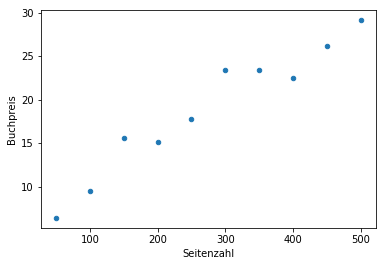

In [51]:
book = DataFrame({
    "pages" : np.linspace(50,500,10),
    "price" : [6.4, 9.5, 15.6, 15.1, 17.8, 23.4, 23.4, 22.5, 26.1, 29.1]
})

book.plot(kind="scatter", x="pages", y="price")

plt.xlabel("Seitenzahl")
plt.ylabel("Buchpreis")
plt.show()

In Python kann dies durch numpy's `polyfit` erzeugt werden. Mit dem Parameter `deg=1` wird so ein Polynom vom Grad 1 (lineare Funktion) erzeugt. Es passt dieses Polynom an diese Daten an. Es gibt zwei Werte zurück:
1. die Steigung
2. den y-Achsenabschnitt

In [55]:
import numpy as np
b, a = np.polyfit(book["pages"], book["price"], deg=1)
print(f"a={a}, b={b}")

a=6.039999999999993, b=0.04672727272727272


Somit steht für $a = 6.04$ und für $b = 0.04673$ fest. Daraus ergibt sich die Geradengleichung:

$$
y = 6.04 + 0.04673x
$$

Daraus lässt sich schliessen, dass die Grundkosten des Verlags sind also $6.04$ SFr. Weiterer verlangt der Verlag pro Seite $0.046$ Rappen.

Beispiel:
Wie viel würde demnach ein Buch mit 375 Seiten kosten?

$x = 375$ einsetzen: $y = 6.04 + 0.04673 \cdot 375$ und erhalten somit: $23.60$.

> Dieses Modell ist allerdings nur begrenzt gültig. Vor allem bei Extrapolationen muss man vorsichtig sein. Wir könnten schon ausrechnen, wie viel ein Buchmit einerMillion Seiten kostet, aber dieser Betrag
dürfte dann wohl kaum der Realität entsprechen.

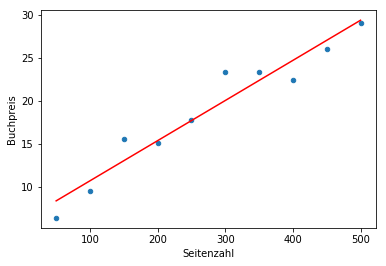

In [64]:
book.plot(kind="scatter", y="price", x="pages")
b, a = np.polyfit(book["pages"], book["price"], deg=1)

# Creates a vector x with length 50, first value is the smallest value
# in book["pages"] and the last value is the biggest value in pages.
# min = 50; max = 500
x = np.linspace(book["pages"].min(), book["pages"].max())

regression = lambda x: a + b * x

plt.plot(x, regression(x), c="red")
plt.xlabel("Seitenzahl")
plt.ylabel("Buchpreis")
plt.show()

#### Beispiel 2.2.8

Wir legen den Daten des Weinkonsums und der Mortalität ein lineares Modell ($y = a + bx$) zu Grunde. Mittels Python berechnen wir $a$ und $b$:

In [78]:
b, a = np.polyfit(mortality["wine"], mortality["mor"], deg=1)
print(f"a={a}, b={b}")

a=7.686554949354207, b=-0.07608090754932781


Damit haben wir für $a=7.68$ und für $b=-0.076$ bestimmt, somit ist die Gleichung der Regressionsgerade:
$$
y = 7.68 - 0.076 \cdot x
$$

Im Scatterplot sehen wir jedoch schnell, dass diese Daten **keinem"** linearen Zusammenhang folgen. Die Regressionsgerade sagt hier also sehr wenig über den wahren Zusammenhang der Daten aus.

Text(0, 0.5, 'Mortalität')

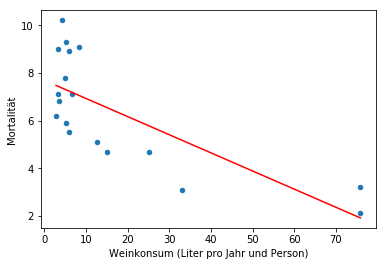

In [84]:
mortality.plot(kind="scatter", x="wine", y="mor")

x = np.linspace(mortality["wine"].min(), mortality["wine"].max())

b, a = np.polyfit(mortality["wine"], mortality["mor"], deg=1)
plt.plot(x, a + b * x, c="red")
plt.xlabel("Weinkonsum (Liter pro Jahr und Person)")
plt.ylabel("Mortalität")

Die Regressionsgerade können wir (fast) immer bestimmen. In den letzten beiden Beispielen (bezogen auf Wein / Mortalität etc) haben wir aber gesehen, dass die Regressionsgerade sehr wenig über die wirkliche Verteilung der Punkte im Streudiagramm aussagt. Dafür gibt es zwei Gründe:
• Die Punkte folgen scheinbar gar keiner Gesetzmässigkeit
• Die Punkte folgen einer nichtlinearen Gesetzmässigkeit

Wie können wir nun aber feststellen, ob ein linearer Zusammenhang der Daten besteht oder nicht? Eine Möglichkeit ist sicher, die Situation graphisch zu betrachten, wie wir das eben gemacht haben. Wir können aber auch einenWert  angeben, der den Zusammenhang numerisch beschreibt

## Empirische Kovarianz und Korrelation

### TODO
negativ & positiv besser beschreiben

### Empirische Kovarianz

> Die Stichprobenkovarianz oder empirische Kovarianz (oft auch einfach Kovarianz) ist in der Statistik eine nichtstandardisierte Maßzahl für den (linearen) Zusammenhang zweier statistischer Variablen. Die korrigierte Stichprobenkovarianz ist eine erwartungstreue Schätzung der Kovarianz einer Grundgesamtheit mittels einer Stichprobe.
Ist die Kovarianz positiv, dann gehen kleine Werte der einen Variable überwiegend einher mit kleinen Werten der anderen Variable und gleichfalls für große Werte. Für eine negative Kovarianz ist das genau umgekehrt. - Wikipedia

Um festzustellen, ob ein linearer Zusammenhang zwischen zwei Grössen besteht, führen wir den Begriff der Kovarianz ein

Sie ist als durchschnittliches Produkt der Abweichungen beider Merkmale von ihrem Mittelwert definiert, wie im Folgenden als Formel dargestellt.

**Wichtig**: Im Skript nicht erwähnt, aber bei der Formel handelt es sich um die *korrigierte Stichprobenvarianz*. Der Unterschied liegt im Vorfaktor $\frac{1}{n}$ der bei der korrigierten Version $\frac{1}{n-1}$ beträgt.

$$
cov_{xy} = \frac{1}{n-1} \sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})
$$

Die Stichprobenkovarianz misst die gemeinsame Streuung („Mitstreuung“) der Beobachtungsdaten einer Stichprobe. Dabei wird die mittlere Abweichung der Beobachtungsdaten von den Mittelwerten $(\bar{x}, \bar{y})$ berechnet.

Der Spezialfall $x = y$:
$$
cov_{xx} = \frac{1}{n-1} \sum_{i=1}^n (x_i - \bar{x})(x_i - \bar{x})
$$

Dies entspricht der empirischen Varianz ($s^2_x$) von $x$:
$$
cov_{xx} = var_x = s^2_x
$$

**Wichtig**: Die Kovarianz erkennt nur lineare Zusammenhänge (also z.B. keine quadratische). Eine Erklärung dazu findet sich im Skript auf Seite 46 - 49.

> Falls es keinen linearen Zusammenhang gibt, so kann die Kovarianz 0 sein, obwohl ein nichtlinearer Zusammenhang besteht. Wir sollten uns nie ausschliesslich auf den Wert der Kovarianz verlassen, sondern immer die Plots auf nichtlineare Zusammenhänge überprüfen.

#### Beispiel 2.2.10 - Benzoapryrene

> Benzoapryrene ist ein krebserregendes Kohlenwasserstoffmolekül, welches das Produkt von unvollständiger Verbrennung ist. Eine Quelle von Benzoapyrene undKohlenmonoxid sind Autoabgase. Colucci und Begeman (1971) analysierten 16 Luftproben, die amHerald Square in Manhattan genommen wurden.
Sie zeichneten die Kohlenmonoxidkonzentration (in parts per million) und die Benzapyrenekonzentration (in Mikrogramm pro 1000 Kubikmeter) für jede Probe auf.

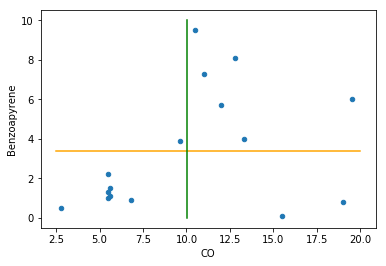

In [102]:
import pandas as pd

# CO = Autoabgase (parts per million)
# Benzoa = Benzoapryrenekonzentration in Mikrogramm pro 1000 Kubikmeter
benzoa = pd.read_csv('Herald.dat', sep="\t")

# CO_min = 2.8 (abgerundet auf 2.5)
# CO_max = 19.5 (aufgerundet auf 20)
benzoa.describe()

benzoa.plot(kind="scatter", x="CO", y="Benzoa")


# Mittelwert Benzoa (y) ploten:
# * (2.5, 20): Länge auf der x-Achse (von Punkt zu Punkt = Gerade)
# * (mean(y), mean(y)): Höhe auf y-Achse (Punkt zu Punkt = Gerade)
plt.plot((2.5, 20), (benzoa["Benzoa"].mean(), benzoa["Benzoa"].mean()), c="orange")
# Mittelwert CO (x) ploten
plt.plot((benzoa["CO"].mean(), benzoa["CO"].mean()), (0, 10), c="green")
plt.ylabel("Benzoapyrene")
plt.show()

In Python kann die Kovarianz eines `DataFrame` mittels `cov()` berechnet werden. Es gibt eine Kovarianzmatrix zurück, siehe unten. Die Kovarianzen von CO mit CO respektive Benzoa mit Benzoa entspricht deren Varianz.

Uns interessiert die Varianz von Benzoa und CO, welche in der Matrix $5.511042$ beträgt ($cov_{\text{CO}\text{ Benzoa}}$)

In [105]:
benzoa.cov()

,CO,Benzoa
CO,25.811625,5.511042
Benzoa,5.511042,9.331625


Das Problem an Kovarianz ist, dass sie schlecht oder kaum zu interpretieren ist. So hat die Kovarianz im obigen Beispiel die Einheit ppm · µg/1000m3 (das Produkt beider Einheiten) was fast unmöglich zu interpretieren ist. Um dies zu korrigieren, führen wir mit der empirische Korrelation ein neues  dimensionsloses Mass ein, das den linearen Zusammenhang zwischen Stichprobenpaaren
$(x_i, y_i)$ misst.

### Empirische Korrelation

> Der Korrelationskoeffizient, auch Produkt-Moment-Korrelation ist ein Maß für den Grad des linearen Zusammenhangs zwischen zwei mindestens intervallskalierten Merkmalen, das nicht von den Maßeinheiten der Messung abhängt und somit dimensionslos ist. Er kann Werte zwischen $-1$ und $+1$ annehmen. Bei einem Wert von $+1$ (bzw. $-1$) besteht ein vollständig positiver (bzw. negativer) linearer Zusammenhang zwischen den betrachteten Merkmalen. Wenn der Korrelationskoeffizient den Wert $0$ aufweist, hängen die beiden Merkmale überhaupt nicht linear voneinander ab. Allerdings können diese ungeachtet dessen in nichtlinearer Weise voneinander abhängen. - Wikipedia

Die empirische Korrelation $r_xy$ (auch $r$ oder $\hat{\rho}$) ist eine Kennzahl über die lineare Abhängigkeit von zwei Grössen. Sie berechnet sich aus der standardisierten Kovarianz. Dabei wird die Kovarianz $cov_{xy}$ durch das Produkt der Standardabweichungen $s_x$ und $s_y$ geteilt. $s_x$ und $s_y$ sind die Standardabweichungen von den Stichproben $x_i$ und $y_i$.

Sie misst Stärke und Richtung der linearen Abhängigkeit zwischen den Daten x und y.

*Sie ist für die Koordinationspaare $(x_i, y_i)$ definiert. Das heisst, jedes Koordinatenpaar ist anderst!* -- REALLY?

$$
r_{xy} = \frac{cov_{xy}}{s_x \cdot s_y}
$$

#### Eigenschaften

1. $r_{xy} = +1$: Punkte liegen auf einer steigenden Geraden ($y = a + bx$, $b > 0$)
2. $r_{xy} = -1$: Punkte liegen auf einer fallenden Geraden ($y = a + bx$, $b < 0$)
3. Sind $x$ und $y$ unabhängig, so beträgt $r_{xy} = 0$. Umkehrschluss gilt jedoch nicht: wenn $r_{xy}$ ist, bedeutet das nicht dass die Variablen unabhängig sind (sondern z.B eine quadratische Abhängigkeit haben).

> Man sollte jedoch nie r berechnen, ohne einen Blick auf das Streudiagramm zu werfen, da ganz verschiedene Strukturen den gleichen Wert von rxy ergeben können. Siehe dazu Abbildung 2.18 auf Seite 54.

#### Python

Der Korrelationskoeffizient $r$ kann mittels `corr()` berechnet werden. Er beträgt $0.968112$, also fast $1$. Damit kann ein enger, linearer Zusammenhang suggeriert werden. Dazu ist der Wert positiv, was einem „je mehr, desto mehr”, also einem positiven linearen Zusammenhang entspricht.

In [107]:
book.corr()

,pages,price
pages,1.000000,0.968112
price,0.968112,1.000000


##### Beispiel 2.2.14
Auch beimWeinkonsum erwarten wir einen negativen Korrelationskoeffizienten, da mit steigendem Weinkonsum die Mortalität sinkt und der nahe bei null liegt. Er beträgt −0.746. Ohne die Daten in einem Streudiagramm darzustellen, würde man aufgrund dieses Wertes fälschlicherweise auf einen starken negativen linearen Zusammenhang schliessen. Als Erinnerung deshalb nachfolgend der Scatterplot.

In [110]:
mortality.corr()

,wine,mor
wine,1.000000,-0.745568
mor,-0.745568,1.000000


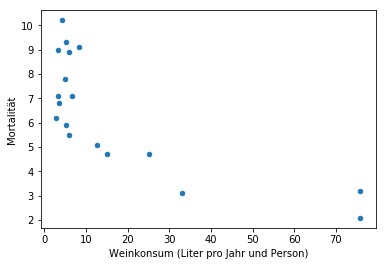

In [111]:
mortality.plot(kind="scatter", x="wine", y="mor")

plt.xlabel("Weinkonsum (Liter pro Jahr und Person)")
plt.ylabel("Mortalität")
plt.show()

Für den Datensatz Herald berechnet sich die Korrelation wie folgt: 
```python
benzoa.corr()
              CO   Benzoa
CO      1.000000 0.355097
Benzoa  0.355097 1.000000
```

Wir erhalten die Korrelationsmatrix. Wieder ist der Eintrag für Zeile CO und Spalte Benzoa entscheidend. Es gilt: $r_xy$ (wobei $x$ = CO und $y$ = Benzoa sind) = 0.3551
Obwohl die Korrelation klein ist, gibt es trotzdem eine physikalische Erklärung für die Korrelation, da beide Stoffe das Produkt von unvollständiger Verbrennung sind. 
Eine Korrelation von 0.36 ergibt typischerweise einen leichten visuellen Eindruck, dass y sich vergrössert, wenn x vergrössert wird. Die Punkte streuen allerdings stark

# Datenbereinigungen / Missing data

> In statistics, missing data, or missing values, occur when no data value is stored for the variable in an observation. Missing data are a common occurrence and can have a significant effect on the conclusions that can be drawn from the data. ata often are missing in research in economics, sociology, and political science because governments or private entities choose not to, or fail to, report critical statistics, or because the information is not available. Sometimes missing values are caused by the researcher—for example, when data collection is done improperly or mistakes are made in data entry. - https://en.wikipedia.org/wiki/Missing_data

Fehlende Daten sind ein häufiges Problem in der Datenanalyse. Deren Umgang ist nicht einheitlich.

## Ursachen / Typen

> Understanding the reasons why data are missing is important for handling the remaining data correctly. If values are missing completely at random, the data sample is likely still representative of the population. But if the values are missing systematically, analysis may be biased. For example, in a study of the relation between IQ and income, if participants with an above-average IQ tend to skip the question ‘What is your salary?’, analyses that do not take into account this missing at random (MAR pattern (see below)) may falsely fail to find a positive association between IQ and salary. Because of these problems, methodologists routinely advise researchers to design studies to minimize the occurrence of missing values.

**Missing Completely at Random (MCAR)**

> Values in a data set are missing completely at random (MCAR) if the events that lead to any particular data-item being missing are independent both of observable variables and of unobservable parameters of interest, and occur entirely at random.[5] When data are MCAR, the analysis performed on the data is unbiased; however, data are rarely MCAR.

> In diesem Fall ist die Ursache für das Fehlen der Variable völlig unsystematisch. Betrachtenwir als Beispiel eine Studie, bei welcher der Grund für die Fettleibigkeit bei K12-Kindern ermittelt wird. MCAR bedeutet in diesem Fall, dass die Eltern zum Beispiel vergessen haben,
ihre Kinder in die Klinik zur Studie zu bringen.

**Missing at Random (MAR)**

> Missing at random (MAR) occurs when the missingness is not random, but where missingness can be fully accounted for by variables where there is complete information.[7] Since MAR is an assumption that is impossible to verify statistically, we must rely on its substantive reasonableness.[8] An example is that males are less likely to fill in a depression survey but this has nothing to do with their level of depression, after accounting for maleness. Depending on the analysis method, these data can still induce parameter bias in analyses due to the contingent emptiness of cells (male, very high depression may have zero entries). However, if the parameter is estimated with Full Information Maximum Likelihood, MAR will provide asymptotically unbiased estimates

>  In diesemFall liegt demFehlen vonDaten eine gewisse Systematik zugrunde. Bei Verwendung der obengenannten K12-Studie sind die fehlenden Daten in diesem Fall zum Beispiel auf den Umzug der Eltern in eine andere Stadt zurückzuführen, weshalb die Kinder die Studie aufgeben mussten das Fehlen hat nichts mit der Studie zu tun.
   

**Missing not at Random (MNAR)**

> Missing not at random (MNAR) (also known as nonignorable nonresponse) is data that is neither MAR nor MCAR (i.e. the value of the variable that's missing is related to the reason it's missing).[5] To extend the previous example, this would occur if men failed to fill in a depression survey because of their level of depression.

> Ein möglicher nichtzufälliger Grund für das Fehlen von Datenwerten ist, dass der fehlende Wert vom hypothetischen Wert abhängt. Ein Beispiel für MNAR ist, dass die Eltern durch die Art der Studie beunruhigt sind und nicht wollen, dass ihre Kinder beispielsweise gemobbt werden, deswegen zogen sie ihre Kinder aus der Studie zurück. Die Schwierigkeit mit MNAR-Daten ist intrinsisch und hat hier mit dem Problem der Identifizierbarkeit der Studienteilnehmer zu tun. Oder so legen zum Beispiel Menschen mit hohen Gehältern in Umfragen ihr Einkommen nicht offen. Ein anderer nichtzufälliger Grund könnte darin liegen, dass fehlende Werte zum Beispiel vom Wert einer anderen Variablen abhängig sind. Zum Beispiel können wir davon ausgehen, dass Frauen ihr Alter generell nicht offen legen wollen. Hier wird der fehlende Wert in der Altersvariable durch die Geschlechtsvariable bee-
influsst.

## Techniques of dealing with missing data

Missing data reduces the representativeness of the sample and can therefore distort inferences about the population. Generally speaking, there are three main approaches to handle missing data:
1. Imputation: where values are filled in the place of missing data
2. Omission: where samples with invalid data are discarded from further analysis and
3. Analysis: by directly applying methods unaffected by the missing values.

> Im Fall von zufällig fehlendenDatenwerten kann es zulässig sein, dieDaten entweder aus demDatensatz zu entfernen oder mit (interpolierten) Daten zu ersetzen, während imFall von nicht-zufälligem Fehlen von Datenwerten das Entfernen von Beobachtungen mit fehlenden Werten eine Verzerrung im Modell erzeugen kann. Wir müssen also sehr vorsichtig sein, bevor wir Beobachtungen entfernen oder neue Werte einsetzen. Beachten Sie, dass die Datenimputation nicht unbedingt zu besseren Resultaten
führt.

### Datenpunkte entfernen

Daten können entweder listenweise oder paarweise entfernt werden, im Unterricht wurde nur listenweises Entfernen (aka vollständige Fallanalyse) betrachtet. Dabei werden alle Beobachtungen mit fehlenden Werten entfernt.

> Bei der listenweise Datenentfernung werden alle Daten für eine Beobachtung gelöscht, die einen oder mehrere fehlende Werte hat. Insbesondere wenn die fehlenden Daten auf eine kleine Anzahl von Beobachtungen beschränkt sind, können Sie diese Fälle einfach aus der Analyse ausschliessen. In den meisten Fällen ist es jedoch nachteilig, die listenweise Löschung zu verwenden. Dies liegt daran, dass die Annahmen von MCAR (Missing Completely Random) in der Regel selten gestützt werden können. Als Ergebnis erzeugen listenweise Löschverfahren voreingenommene Parameterschätzun-
gen.

> In statistics, listwise deletion is a method for handling missing data. In this method, an entire record is excluded from analysis if any single value is missing.[1]: 

See also: https://en.wikipedia.org/wiki/Listwise_deletion

Weglassen von Variablen: Falls mehr als 60% der Beobachtungen fehlen, kann eine Variable auch weggelassen werden, sofern sie nicht wichtig ist. Allerdings ist Datenimputation imVergleich zum
Weglassen von Variablen in der Regel vorzuziehen.

#### Beispiele in Python

In [130]:
import numpy as np
import pandas as pd

# Dummy-Datensatz mit fehlenden Daten erzeugen

data = {
    'Name':  ['John','Paul', np.NaN, 'Wale', 'Mary', 'Carli', 'Steve'],
    'Sex':   ['M',np.nan,np.nan,'M','F','F','M'],
    'Goals': [5,10,np.nan,19,5,0,7],
    'Value': [55,84,np.nan,90,63,15,46]
}

df = pd.DataFrame(data, columns=['Name', 'Sex', 'Goals', 'Value'])
df

# Mit df.dropna() werden alle Zeilen, die mind. einen NaN-Wert haben entfernt
df.dropna()

# Mit df.dropna(how="all") werden nur die Records entfernt,
# die nur aus NaN Einträge bestehen
df.dropna(how="all")

# Besteht eine Spalte ausschliesslich aus NaN, kann sie mittels
# df.dropna(axis=1) entfernt werden. Dazu erstellen wir eine Fake-
# Spalte aus NaNs
df['OnlyNan'] = np.nan
# Und entfernen sie
df.dropna(how="all", axis=1)

# Man kann auch einen Schwellwert definieren (thres=x)
# In diesem Fall braucht es in jeder Spalte folglich mindestens
# zwei Werte, die verschieden von NaN sind, ansonsten wird die Spalte gelöscht.
df.dropna(axis=1, thresh=2)

,Name,Sex,Goals,Value,OnlyNan
0,John,M,5.0,55.0,NaN
1,Paul,NaN,10.0,84.0,NaN
3,Wale,M,19.0,90.0,NaN
4,Mary,F,5.0,63.0,NaN
5,Carli,F,0.0,15.0,NaN
6,Steve,M,7.0,46.0,NaN


### Data Imputation

Imputation aufgrund vom Mittelwert, Median oder Modus. Bei numerischen Variablen werden fehlende Werte mit dem Mittelwert oder Median der vorhandenen Werte ersetzt.

Bei katogerialen Variablen (e.g. Gruppen) ersetzt man den fehlenden Wert durch den häufigsten Wert (Modus). Diese Technik funktioniert gut, wenn die Werte völlig zufällig fehlen.


In [146]:
# Example: Scikit-learn
import numpy as np
import pandas as pd
from sklearn.preprocessing import Imputer

data = {
    'Name':    ['John','Paul', np.NaN, 'Wale', 'Mary', 'Carli', 'Steve'],
    'Age':     [21,23,np.nan,19,25,np.nan,15],
    'Sex':     ['M',np.nan,np.nan,'M','F','F','M'],
    'Goals':   [5,10,np.nan,19,5,0,7],
    'Assists': [7,4,np.nan,9,7,6,4],
    'Value':   [55,84,np.nan,90,63,15,46]
}

df = pd.DataFrame(data, columns=['Name','Age','Sex', 'Goals', 'Assists', 'Value'])

values = df[["Age", "Goals", "Assists", "Value"]].values

# strategy bezieht sich auf die Imputationsstrategie, und der
# Standardwert ist der Mittelwert (mean) 
# der Achse (0 für Spalten und 1 für Zeilen). Die anderen Strategien
# sind median und most_frequent.
imputer = Imputer(missing_values="NaN", strategy="mean", axis=0, verbose=0, copy=True)
transformed_values = imputer.fit_transform(values)

df_new = pd.DataFrame(transformed_values, columns=['Age', 'Goals', 'Assists', 'Value'])
df_new

C:\Users\claud\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


,Age,Goals,Assists,Value
0,21.0,5.000000,7.000000,55.000000
1,23.0,10.000000,4.000000,84.000000
2,20.6,7.666667,6.166667,58.833333
3,19.0,19.000000,9.000000,90.000000
4,25.0,5.000000,7.000000,63.000000
5,20.6,0.000000,6.000000,15.000000
6,15.0,7.000000,4.000000,46.000000


In [149]:
from fancyimpute import SimpleFill

df_imputed = DataFrame(
    SimpleFill().fit_transform(values),
    columns=["Age", "Goals", "Assists", "Value"]
)

ModuleNotFoundError: No module named 'fancyimpute'

Datenimputation mit K-Nearest Neighbour:

Mit `KNN(k=x).fit_transform(data)` werden die fehlendenWerte aufgrund der k nächstliegendenWerte (Nachbarn) ersetzt. Die Anzahl k der zu betrachtenden nächsten Nachbarn muss festgelegt werden. Standardmässig werden alle k Werte gleich (uniform) zur Berechnung des Ersatzwertes gewichtet. Es gibt aber auch andere Gewichtungsmethoden:

In [150]:
from fancyimpute import KNN

df_imputed = pd.DataFrame(
    KNN(k=3).fit_transform(values),
    columns=["Age", "Goals", "Assists", "Value"]
)

ModuleNotFoundError: No module named 'fancyimpute'

Datenimputation mit MIC

Mit `fancyimpute.MICE().complete(data)` werden fehlende Datenwerte durch Mehrfachimputation (Multiple Imputation by Chained Equations) ersetzt. MICE ist ein Prozess, bei dem die fehlenden Werte mehrfach ersetzt werden, um „vollständige” Datensätze zu erstellen. Multiple Imputation hat viele Vorteile gegenüber herkömmlichen Methoden. Multiple Imputation durch verkettete Gleichungen (MICE) ist eine Imputationsmethode, die mit der Annahme arbeitet, dass die fehlenden Daten zufällig (MAR) fehlen. Bedenken Sie, dass für MAR die Art der fehlenden Daten mit den beobachteten Daten, aber nicht mit den fehlendenDaten zusammenhängt. Der MICEAlgorithmus arbeitet mit mehreren Regressionsmodellen, und jeder fehlende Wert wird abhängig von den beobachteten (nicht fehlenden) Werten bedingt modelliert.

In [151]:
from fancyimpute import IterativeImputer

df_imputed = pd.DataFrame(
    IterativeImputer().fit_transform(values),
    columns =["Age", "Goals", "Assists", "Value"]
)
df_imputed

ModuleNotFoundError: No module named 'fancyimpute'